## Matplotlib

`pip install matplotlib` 安装扩展库

### 线图

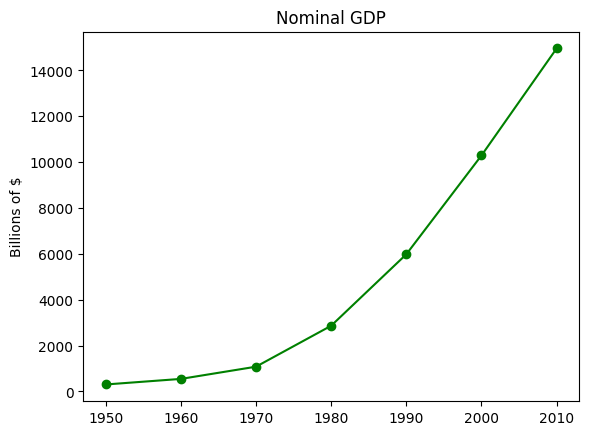

In [1]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# 创建一个线图，x轴是年份，y轴是gdp
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# 添加一个标题
plt.title("Nominal GDP")

# 为y轴添加标记
plt.ylabel("Billions of $")
plt.show()

### 条形图

当需要展示某些离散项目集合中的数量是如何变化时，条形图是一个不错的选择。

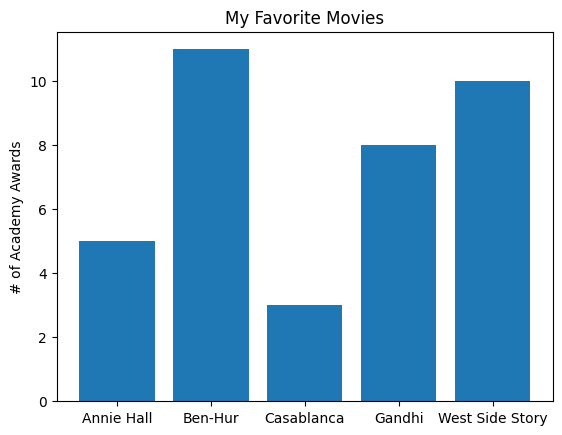

In [2]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# 在左侧 x 坐标 [0, 1, 2, 3, 4] 上，绘制高度为 [num_oscars] 的条形图
plt.bar(range(len(movies)), num_oscars)

plt.title("My Favorite Movies")     # 添加标题
plt.ylabel("# of Academy Awards")   # 添加y轴标签

# 在 x 轴上标记电影的名字
plt.xticks(range(len(movies)), movies)

plt.show()

条形图也可以用来绘制大量数值直方图，以便直观地探索值的分布情况。

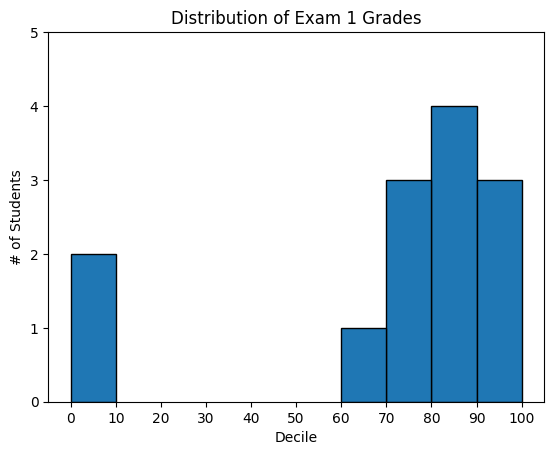

In [3]:
from collections import Counter

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

# 将成绩按十位数分桶，但将 100 放在 90 位数中
# Counter 类会将一个列表转换为字典，键是列表中的元素，值是该元素在列表中出现的次数。
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()],  # 将条形图向右移动 5 个单位
        histogram.values(),                 # 给每个条形图正确的高度
        10,                                 # 给每个条形图正确的宽度
        edgecolor=(0, 0, 0))                # 为每个条形图添加黑色边框

plt.axis([-5, 105, 0, 5])                   # x-axis from -5 to 105, 
                                            # y-axis from 0 to 5

plt.xticks([10 * i for i in range(11)])     # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

### 散点图

散点图是可视化两个成对数据集之间关系的不错的选择。

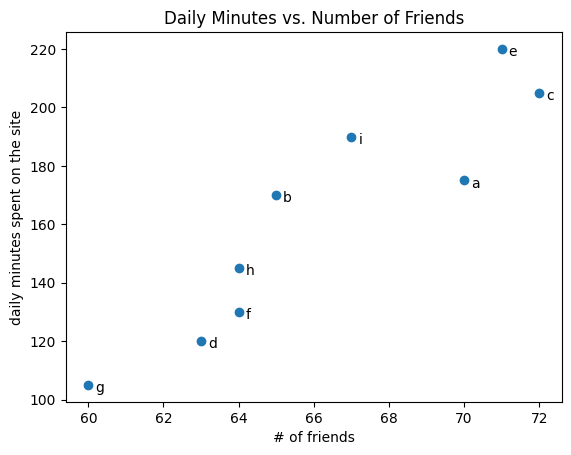

In [4]:
friends = [70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# 给每个点加标签
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                 # 把标签放在对应的点上
                 xy=(friend_count, minute_count),
                 xytext=(5, -5),                  # 标识符略微偏离
                 textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

 ## 数据预处理

 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

 ### 0 数据集介绍

开源软件的开发涉及到分散在各地的开发者社区，他们通常在 GitHub 这样的平台上进行协作。在这种环境中，机器人被引入来自动化与拉取请求相关的预定义任务，这些机器人在 GitHub 社区中行为与人类用户相似。为了确保平台的安全性、有效性和透明度，识别机器人账号和非机器人账号变得尤为重要。

 ### 1 读取数据集

In [5]:
import pandas as pd

raw_data = pd.read_csv('./data/github_bot_raw_data.csv')

raw_data

,actor_id,label,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,...,email,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,1081405,Human,dlazesz,1081405,MDQ6VXNlcjEwODE0MDU=,https://avatars.githubusercontent.com/u/108140...,NaN,https://api.github.com/users/dlazesz,https://github.com/dlazesz,https://api.github.com/users/dlazesz/followers,...,NaN,NaN,NaN,NaN,26,1,5,1,2011-09-26T17:27:03Z,2023-10-13T11:21:10Z
1,13100598,Human,sarkiroka,13100598,MDQ6VXNlcjEzMTAwNTk4,https://avatars.githubusercontent.com/u/131005...,NaN,https://api.github.com/users/sarkiroka,https://github.com/sarkiroka,https://api.github.com/users/sarkiroka/followers,...,NaN,True,"I just press the buttons randomly, and the pro...",NaN,30,3,9,6,2015-06-29T10:12:46Z,2023-10-07T06:26:14Z
2,22494,Human,ZoomQuiet,22494,MDQ6VXNlcjIyNDk0,https://avatars.githubusercontent.com/u/22494?v=4,NaN,https://api.github.com/users/ZoomQuiet,https://github.com/ZoomQuiet,https://api.github.com/users/ZoomQuiet/followers,...,NaN,True,"Time is unimportant,\r\nonly life important.",zoomq,103,49,1212,221,2008-08-29T16:20:03Z,2023-10-02T02:11:21Z
3,7648032,Bot,AlCutter,7648032,MDQ6VXNlcjc2NDgwMzI=,https://avatars.githubusercontent.com/u/764803...,NaN,https://api.github.com/users/AlCutter,https://github.com/AlCutter,https://api.github.com/users/AlCutter/followers,...,NaN,NaN,NaN,NaN,49,0,84,2,2014-05-20T18:43:09Z,2023-10-12T12:54:59Z
4,2163522,Human,meetyan,2163522,MDQ6VXNlcjIxNjM1MjI=,https://avatars.githubusercontent.com/u/216352...,NaN,https://api.github.com/users/meetyan,https://github.com/meetyan,https://api.github.com/users/meetyan/followers,...,NaN,True,NaN,NaN,11,1,6,2,2012-08-16T14:19:13Z,2023-10-06T11:58:41Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20353,8052756,Bot,tbreeds,8052756,MDQ6VXNlcjgwNTI3NTY=,https://avatars.githubusercontent.com/u/805275...,NaN,https://api.github.com/users/tbreeds,https://github.com/tbreeds,https://api.github.com/users/tbreeds/followers,...,tony@bakeyournoodle.com,NaN,Tony came to Linux in 1994 and has never looke...,tonybreeds,36,16,11,4,2014-07-02T23:27:34Z,2023-08-15T16:38:34Z
20354,34321341,Human,ssisil,34321341,MDQ6VXNlcjM0MzIxMzQx,https://avatars.githubusercontent.com/u/343213...,NaN,https://api.github.com/users/ssisil,https://github.com/ssisil,https://api.github.com/users/ssisil/followers,...,ssisil@pivotal.io,NaN,NaN,NaN,16,0,3,0,2017-12-06T21:56:31Z,2023-07-26T18:32:25Z
20355,15847407,Human,dbfannin,15847407,MDQ6VXNlcjE1ODQ3NDA3,https://avatars.githubusercontent.com/u/158474...,NaN,https://api.github.com/users/dbfannin,https://github.com/dbfannin,https://api.github.com/users/dbfannin/followers,...,NaN,NaN,Software engineer at RealTracs.,NaN,13,0,10,1,2015-11-14T14:44:05Z,2022-08-23T21:09:49Z
20356,94929125,Human,jambayk,94929125,U_kgDOBaiA5Q,https://avatars.githubusercontent.com/u/949291...,NaN,https://api.github.com/users/jambayk,https://github.com/jambayk,https://api.github.com/users/jambayk/followers,...,jambaykinley@microsoft.com,NaN,NaN,NaN,7,0,2,0,2021-11-23T18:55:29Z,2023-10-06T22:50:45Z


#### 数据集情况

    
| Field               |  Description                                     |
|---------------------|---------------------------------------------------|
| actor_id          |  GitHub用户的ID (示例值: 1081405)               |
| label             |  用户标签（"Human"或"Bot"） (示例值: Human)      |
| login             |  GitHub用户的登录名 (示例值: dlazesz)           |
| id                |  用户的GitHub ID (示例值: 1081405)              |
| node_id           |  用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=) |
| avatar_url        |  GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4) |
| gravatar_id       |  Gravatar ID (示例值: None)                     |
| url               |  GitHub用户的URL (示例值: https://api.github.com/users/dlazesz) |
| html_url          |  GitHub用户的HTML URL (示例值: https://github.com/dlazesz) |
| followers_url     |  GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers) |
| following_url     |  GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user}) |
| gists_url         |  用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id}) |
| starred_url       |  用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo}) |
| subscriptions_url |  用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions) |
| organizations_url |  用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs) |
| repos_url         |  用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos) |
| events_url        |  用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy}) |
| received_events_url |  用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events) |
| type              |  用户类型，通常为"User" (示例值: User)            |
| site_admin        |  表示用户是否是GitHub网站管理员的标志 (示例值: False) |
| name              |  用户的姓名 (示例值: Indig Balázs)              |
| company           |  用户所在公司 (示例值: None)                    |
| blog              |  用户的博客 (示例值: None)                      |
| location          |  用户的位置 (示例值: None)                      |
| email             |  用户的电子邮件 (示例值: None)                  |
| hireable          |  表示用户是否愿意被雇佣的标志 (示例值: None)     |
| bio               |  用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None) |
| twitter_username  |  用户的Twitter用户名 (示例值: None)             |
| public_repos      |  用户在GitHub上的公共代码仓库数量 (示例值: 26)  |
| public_gists      |  用户的公共Gists数量 (示例值: 1)                |
| followers         |  关注该用户的其他GitHub用户数量 (示例值: 5)     |
| following         |  该用户关注的其他GitHub用户数量 (示例值: 1)     |
| created_at        |  用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z) |
| updated_at        |  用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z) |


 ### 2 删除重复数据

#### 按行删除

In [6]:
raw_data.drop_duplicates(subset=['actor_id'], inplace=True)

raw_data

,actor_id,label,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,...,email,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,1081405,Human,dlazesz,1081405,MDQ6VXNlcjEwODE0MDU=,https://avatars.githubusercontent.com/u/108140...,NaN,https://api.github.com/users/dlazesz,https://github.com/dlazesz,https://api.github.com/users/dlazesz/followers,...,NaN,NaN,NaN,NaN,26,1,5,1,2011-09-26T17:27:03Z,2023-10-13T11:21:10Z
1,13100598,Human,sarkiroka,13100598,MDQ6VXNlcjEzMTAwNTk4,https://avatars.githubusercontent.com/u/131005...,NaN,https://api.github.com/users/sarkiroka,https://github.com/sarkiroka,https://api.github.com/users/sarkiroka/followers,...,NaN,True,"I just press the buttons randomly, and the pro...",NaN,30,3,9,6,2015-06-29T10:12:46Z,2023-10-07T06:26:14Z
2,22494,Human,ZoomQuiet,22494,MDQ6VXNlcjIyNDk0,https://avatars.githubusercontent.com/u/22494?v=4,NaN,https://api.github.com/users/ZoomQuiet,https://github.com/ZoomQuiet,https://api.github.com/users/ZoomQuiet/followers,...,NaN,True,"Time is unimportant,\r\nonly life important.",zoomq,103,49,1212,221,2008-08-29T16:20:03Z,2023-10-02T02:11:21Z
3,7648032,Bot,AlCutter,7648032,MDQ6VXNlcjc2NDgwMzI=,https://avatars.githubusercontent.com/u/764803...,NaN,https://api.github.com/users/AlCutter,https://github.com/AlCutter,https://api.github.com/users/AlCutter/followers,...,NaN,NaN,NaN,NaN,49,0,84,2,2014-05-20T18:43:09Z,2023-10-12T12:54:59Z
4,2163522,Human,meetyan,2163522,MDQ6VXNlcjIxNjM1MjI=,https://avatars.githubusercontent.com/u/216352...,NaN,https://api.github.com/users/meetyan,https://github.com/meetyan,https://api.github.com/users/meetyan/followers,...,NaN,True,NaN,NaN,11,1,6,2,2012-08-16T14:19:13Z,2023-10-06T11:58:41Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20344,8052756,Bot,tbreeds,8052756,MDQ6VXNlcjgwNTI3NTY=,https://avatars.githubusercontent.com/u/805275...,NaN,https://api.github.com/users/tbreeds,https://github.com/tbreeds,https://api.github.com/users/tbreeds/followers,...,tony@bakeyournoodle.com,NaN,Tony came to Linux in 1994 and has never looke...,tonybreeds,36,16,11,4,2014-07-02T23:27:34Z,2023-08-15T16:38:34Z
20345,34321341,Human,ssisil,34321341,MDQ6VXNlcjM0MzIxMzQx,https://avatars.githubusercontent.com/u/343213...,NaN,https://api.github.com/users/ssisil,https://github.com/ssisil,https://api.github.com/users/ssisil/followers,...,ssisil@pivotal.io,NaN,NaN,NaN,16,0,3,0,2017-12-06T21:56:31Z,2023-07-26T18:32:25Z
20346,15847407,Human,dbfannin,15847407,MDQ6VXNlcjE1ODQ3NDA3,https://avatars.githubusercontent.com/u/158474...,NaN,https://api.github.com/users/dbfannin,https://github.com/dbfannin,https://api.github.com/users/dbfannin/followers,...,NaN,NaN,Software engineer at RealTracs.,NaN,13,0,10,1,2015-11-14T14:44:05Z,2022-08-23T21:09:49Z
20347,94929125,Human,jambayk,94929125,U_kgDOBaiA5Q,https://avatars.githubusercontent.com/u/949291...,NaN,https://api.github.com/users/jambayk,https://github.com/jambayk,https://api.github.com/users/jambayk/followers,...,jambaykinley@microsoft.com,NaN,NaN,NaN,7,0,2,0,2021-11-23T18:55:29Z,2023-10-06T22:50:45Z


#### 按列删除

In [7]:
columns = [
    # 'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    # 'id',  # 用户的GitHub ID (示例值: 1081405)
    # 'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    # 'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    # 'gravatar_id',  # Gravatar ID (示例值: None)
    # 'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    # 'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    # 'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    # 'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    # 'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    # 'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    # 'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    # 'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    # 'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    # 'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    # 'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]

In [8]:
data = raw_data[columns]

data

,label,login,type,site_admin,name,company,blog,location,email,hireable,bio,twitter_username,public_repos,public_gists,followers,following,created_at,updated_at
0,Human,dlazesz,User,False,Indig Balázs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,1,5,1,2011-09-26T17:27:03Z,2023-10-13T11:21:10Z
1,Human,sarkiroka,User,False,sarkiroka,NaN,https://sarkiroka.hu,NaN,NaN,True,"I just press the buttons randomly, and the pro...",NaN,30,3,9,6,2015-06-29T10:12:46Z,2023-10-07T06:26:14Z
2,Human,ZoomQuiet,User,False,Zoom.Quiet,蟒营® py.101.camp,http://zoomquiet.io,"ZhuHai,China,Earth",NaN,True,"Time is unimportant,\r\nonly life important.",zoomq,103,49,1212,221,2008-08-29T16:20:03Z,2023-10-02T02:11:21Z
3,Bot,AlCutter,User,False,Al Cutter,NaN,NaN,"Sussex, UK",NaN,NaN,NaN,NaN,49,0,84,2,2014-05-20T18:43:09Z,2023-10-12T12:54:59Z
4,Human,meetyan,User,False,Jiajun Yan,NaN,NaN,NaN,NaN,True,NaN,NaN,11,1,6,2,2012-08-16T14:19:13Z,2023-10-06T11:58:41Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20344,Bot,tbreeds,User,False,Tony Breeds,@RedHatOfficial,http://bakeyournoodle.com/,"Canberra, ACT, Australia",tony@bakeyournoodle.com,NaN,Tony came to Linux in 1994 and has never looke...,tonybreeds,36,16,11,4,2014-07-02T23:27:34Z,2023-08-15T16:38:34Z
20345,Human,ssisil,User,False,NaN,NaN,NaN,NaN,ssisil@pivotal.io,NaN,NaN,NaN,16,0,3,0,2017-12-06T21:56:31Z,2023-07-26T18:32:25Z
20346,Human,dbfannin,User,False,NaN,RealTracs,NaN,"Nashville, TN",NaN,NaN,Software engineer at RealTracs.,NaN,13,0,10,1,2015-11-14T14:44:05Z,2022-08-23T21:09:49Z
20347,Human,jambayk,User,False,Jambay Kinley,Microsoft,NaN,NaN,jambaykinley@microsoft.com,NaN,NaN,NaN,7,0,2,0,2021-11-23T18:55:29Z,2023-10-06T22:50:45Z


### 3 缺失值处理

In [9]:
# 查看各列的缺失值
data.isna().sum()

label                   0
login                   0
type                    0
site_admin              0
name                 2589
company              8980
blog                11257
location             7078
email               11738
hireable            16470
bio                 10929
twitter_username    14854
public_repos            0
public_gists            0
followers               0
following               0
created_at              0
updated_at              0
dtype: int64

In [10]:
# 转化成 boolean 变量
data.loc[:, 'company'] = data['company'].notna()
data.loc[:, 'location'] = data['location'].notna()
data.loc[:, 'blog'] = data['blog'].notna()
data.loc[:, 'hireable'].fillna(False, inplace=True)


# 文本数据用空字符串填充空值
text_columns = [
    'name',
    'email',
    'bio',
    'twitter_username'
]

for column in text_columns:
    data.loc[:, column] = data[column].fillna('').astype(str)

/var/folders/yt/zyyfjptj5c39_16l_f7td1mm0000gn/T/ipykernel_12651/4273052501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'hireable'].fillna(False, inplace=True)


In [11]:
data.isna().sum()

label               0
login               0
type                0
site_admin          0
name                0
company             0
blog                0
location            0
email               0
hireable            0
bio                 0
twitter_username    0
public_repos        0
public_gists        0
followers           0
following           0
created_at          0
updated_at          0
dtype: int64

### 4 数据变换

In [12]:
# 转化成 boolean 变量
data.loc[:, 'type'] = data['type'].apply(lambda x: x == 'User')

data['type'].value_counts()

type
True     19597
False      171
Name: count, dtype: int64

In [13]:
# 将created_at、updated_at转为时间戳

data.loc[:, 'created_at'] = pd.to_datetime(data['created_at'])
data.loc[:, 'updated_at'] = pd.to_datetime(data['updated_at'])

In [14]:
import re

# 计算文本中 "bot" 出现的总频数
text_columns = [
    'login',
    'name',
    'email',
    'bio',
    'twitter_username'
]

data.loc[:, 'text_bot_count'] = 0

for column in text_columns:
    data.loc[:,
             'text_bot_count'] += data[column].str.count('bot', flags=re.IGNORECASE)

data['text_bot_count'].value_counts()

/var/folders/yt/zyyfjptj5c39_16l_f7td1mm0000gn/T/ipykernel_12651/3057227103.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'text_bot_count'] = 0


text_bot_count
0    19003
1      425
2      251
3       75
4        9
5        5
Name: count, dtype: int64

In [15]:
final_columns = [
    'label',        # 用户标签（"Human"或"Bot"） (示例值: Human)
    # 'login',      # GitHub用户的登录名 (示例值: dlazesz)
    'type',         # 用户类型，通常为"User" (示例值: User)
    'site_admin',   # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    # 'name',       # 用户的姓名 (示例值: Indig Balázs)
    'company',      # 用户所在公司 (示例值: None)
    'blog',         # 用户的博客 (示例值: None)
    'location',     # 用户的位置 (示例值: None)
    # 'email',      # 用户的电子邮件 (示例值: None)
    'hireable',     # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',          # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    # 'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',     # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',     # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',    # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',    # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
    'text_bot_count',
]

data[final_columns]

,label,type,site_admin,company,blog,location,hireable,bio,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,,26,1,5,1,2011-09-26 17:27:03+00:00,2023-10-13 11:21:10+00:00,0
1,Human,True,False,False,True,False,True,"I just press the buttons randomly, and the pro...",30,3,9,6,2015-06-29 10:12:46+00:00,2023-10-07 06:26:14+00:00,0
2,Human,True,False,True,True,True,True,"Time is unimportant,\r\nonly life important.",103,49,1212,221,2008-08-29 16:20:03+00:00,2023-10-02 02:11:21+00:00,0
3,Bot,True,False,False,False,True,False,,49,0,84,2,2014-05-20 18:43:09+00:00,2023-10-12 12:54:59+00:00,0
4,Human,True,False,False,False,False,True,,11,1,6,2,2012-08-16 14:19:13+00:00,2023-10-06 11:58:41+00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20344,Bot,True,False,True,True,True,False,Tony came to Linux in 1994 and has never looke...,36,16,11,4,2014-07-02 23:27:34+00:00,2023-08-15 16:38:34+00:00,0
20345,Human,True,False,False,False,False,False,,16,0,3,0,2017-12-06 21:56:31+00:00,2023-07-26 18:32:25+00:00,0
20346,Human,True,False,True,False,True,False,Software engineer at RealTracs.,13,0,10,1,2015-11-14 14:44:05+00:00,2022-08-23 21:09:49+00:00,0
20347,Human,True,False,True,False,False,False,,7,0,2,0,2021-11-23 18:55:29+00:00,2023-10-06 22:50:45+00:00,0


### 5 保存数据

In [16]:
data[final_columns].to_csv('./data/github_bot_processed_data.csv', index=False)

## 数据探索

In [17]:
from typing import List, Dict
from collections import Counter
import math

import matplotlib.pyplot as plt


def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)


def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)


def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)

In [18]:
import random

random.seed(0)


def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2


def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z = 10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z


# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
          for _ in range(10000)]

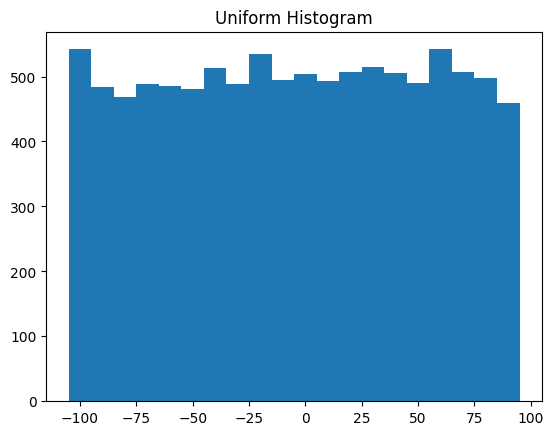

In [19]:
plot_histogram(uniform, 10, "Uniform Histogram")

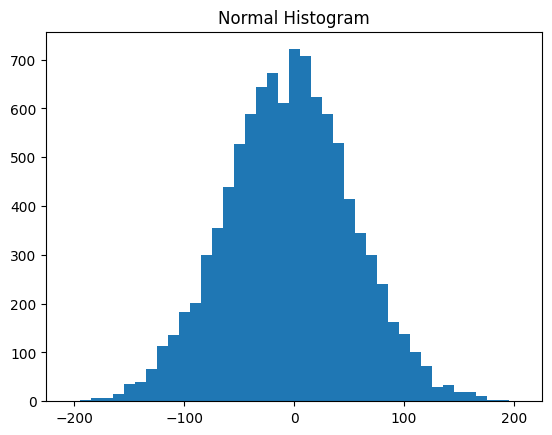

In [20]:
plot_histogram(normal, 10, "Normal Histogram")

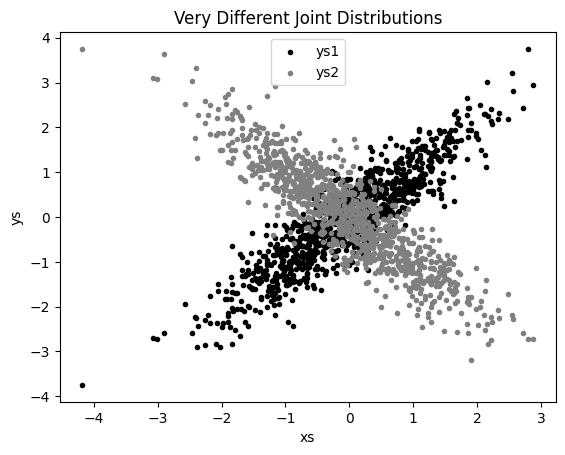

In [21]:
def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

让我们深入研究使用Python进行数据可视化的主要库，以及它们能够生成的各种图表类型。我们将从最基本数据的初步探索开始，然后逐渐深入到更复杂的图表和可视化技术。

结构如下：
1. 初步探索
2. Matplotlib
3. Seaborn

### 探索一维数据

### 0 初步探索

In [22]:
import pandas as pd
df = pd.read_csv('./data/github_bot_processed_data.csv')
df.head()

,label,type,site_admin,company,blog,location,hireable,bio,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,NaN,26,1,5,1,2011-09-26 17:27:03+00:00,2023-10-13 11:21:10+00:00,0
1,Human,True,False,False,True,False,True,"I just press the buttons randomly, and the pro...",30,3,9,6,2015-06-29 10:12:46+00:00,2023-10-07 06:26:14+00:00,0
2,Human,True,False,True,True,True,True,"Time is unimportant,\r\nonly life important.",103,49,1212,221,2008-08-29 16:20:03+00:00,2023-10-02 02:11:21+00:00,0
3,Bot,True,False,False,False,True,False,NaN,49,0,84,2,2014-05-20 18:43:09+00:00,2023-10-12 12:54:59+00:00,0
4,Human,True,False,False,False,False,True,NaN,11,1,6,2,2012-08-16 14:19:13+00:00,2023-10-06 11:58:41+00:00,0


In [23]:
pd.set_option('display.max_rows', 500)      # 设置显示的最大行数
pd.set_option('display.max_columns', 500)   # 设置显示的最大列数
pd.set_option('display.width', 1000)        # 设置显示宽度

In [24]:
df.head()

,label,type,site_admin,company,blog,location,hireable,bio,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,NaN,26,1,5,1,2011-09-26 17:27:03+00:00,2023-10-13 11:21:10+00:00,0
1,Human,True,False,False,True,False,True,"I just press the buttons randomly, and the pro...",30,3,9,6,2015-06-29 10:12:46+00:00,2023-10-07 06:26:14+00:00,0
2,Human,True,False,True,True,True,True,"Time is unimportant,\r\nonly life important.",103,49,1212,221,2008-08-29 16:20:03+00:00,2023-10-02 02:11:21+00:00,0
3,Bot,True,False,False,False,True,False,NaN,49,0,84,2,2014-05-20 18:43:09+00:00,2023-10-12 12:54:59+00:00,0
4,Human,True,False,False,False,False,True,NaN,11,1,6,2,2012-08-16 14:19:13+00:00,2023-10-06 11:58:41+00:00,0


使用 `info` 命令，我们将看到每列包含的数据类型。我们可以发现一列的情况，当使用head命令查看时，该列似乎是数字的，但是如果我们查看后续数据，则字符串格式的值将被编码为字符串。

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB


In [26]:
format_dict = {'created_at': '{:%Y-%m}', 'updated_at': '{:%Y-%m}'}

# 确保Month列有日期时间格式

df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])

# 应用样式到可视化
df.head().style.format(format_dict)

,label,type,site_admin,company,blog,location,hireable,bio,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,nan,26,1,5,1,2011-09,2023-10,0
1,Human,True,False,False,True,False,True,"I just press the buttons randomly, and the program evolves...",30,3,9,6,2015-06,2023-10,0
2,Human,True,False,True,True,True,True,"Time is unimportant, only life important.",103,49,1212,221,2008-08,2023-10,0
3,Bot,True,False,False,False,True,False,nan,49,0,84,2,2014-05,2023-10,0
4,Human,True,False,False,False,False,True,nan,11,1,6,2,2012-08,2023-10,0


使用 `describe` 命令，我们将看到数据如何分布，最大值，最小值，均值……

In [27]:
df.describe()

,public_repos,public_gists,followers,following,text_bot_count
count,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000
mean,84.139215,25.214083,245.497015,44.520741,0.061362
std,574.750217,635.690142,1535.939961,366.793439,0.341003
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,7.000000,0.000000,0.000000
50%,35.000000,2.000000,33.000000,4.000000,0.000000
75%,83.000000,10.000000,125.000000,22.000000,0.000000
max,50000.000000,55781.000000,95752.000000,27775.000000,5.000000


使用颜色渐变来显示数据值

In [28]:
format_dict = {'created_at': '{:%Y-%m}', 'updated_at': '{:%Y-%m}'}
df.head(10).style.format(format_dict).background_gradient(subset=['public_repos',	'public_gists'	, 'followers',	'following'], cmap='BuGn')

,label,type,site_admin,company,blog,location,hireable,bio,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,nan,26,1,5,1,2011-09,2023-10,0
1,Human,True,False,False,True,False,True,"I just press the buttons randomly, and the program evolves...",30,3,9,6,2015-06,2023-10,0
2,Human,True,False,True,True,True,True,"Time is unimportant, only life important.",103,49,1212,221,2008-08,2023-10,0
3,Bot,True,False,False,False,True,False,nan,49,0,84,2,2014-05,2023-10,0
4,Human,True,False,False,False,False,True,nan,11,1,6,2,2012-08,2023-10,0
5,Human,True,False,True,True,True,False,Done studying. Need challenges.,56,1,22,7,2017-04,2023-10,0
6,Human,True,False,True,True,True,True,Administrator of MOONGIFT that is introducing open source software everyday to Japanese engineers since 2004.,277,1139,63,16,2008-04,2023-09,0
7,Human,True,False,True,False,True,False,"Senior Software Engineer at Google, working on Certificate Transparency and generalized transparency.",37,1,22,0,2012-01,2023-08,0
8,Human,True,False,False,False,False,False,nan,27,2,37,596,2019-12,2023-10,0
9,Human,True,False,True,True,True,False,Hi,42,9,14,2,2013-07,2023-10,0


用条形显示数据值

In [29]:
df.head().style.format(format_dict).bar(
    color='red', subset=['followers', 'following'])

,label,type,site_admin,company,blog,location,hireable,bio,public_repos,public_gists,followers,following,created_at,updated_at,text_bot_count
0,Human,True,False,False,False,False,False,nan,26,1,5,1,2011-09,2023-10,0
1,Human,True,False,False,True,False,True,"I just press the buttons randomly, and the program evolves...",30,3,9,6,2015-06,2023-10,0
2,Human,True,False,True,True,True,True,"Time is unimportant, only life important.",103,49,1212,221,2008-08,2023-10,0
3,Bot,True,False,False,False,True,False,nan,49,0,84,2,2014-05,2023-10,0
4,Human,True,False,False,False,False,True,nan,11,1,6,2,2012-08,2023-10,0


In [30]:
import numpy as np

# 定义需要进行对数变换的列
num_cols = ['public_repos', 'public_gists', 'followers', 'following']

# 对这些列进行对数变换，同时添加新列到DataFrame
df['log_public_repos'] = np.log(df['public_repos'] + 1)  # 加1避免log(0)
df['log_public_gists'] = np.log(df['public_gists'] + 1)
df['log_followers'] = np.log(df['followers'] + 1)
df['log_following'] = np.log(df['following'] + 1)

# 移除原始列
df = df.drop(columns=num_cols)
df.head()

,label,type,site_admin,company,blog,location,hireable,bio,created_at,updated_at,text_bot_count,log_public_repos,log_public_gists,log_followers,log_following
0,Human,True,False,False,False,False,False,NaN,2011-09-26 17:27:03+00:00,2023-10-13 11:21:10+00:00,0,3.295837,0.693147,1.791759,0.693147
1,Human,True,False,False,True,False,True,"I just press the buttons randomly, and the pro...",2015-06-29 10:12:46+00:00,2023-10-07 06:26:14+00:00,0,3.433987,1.386294,2.302585,1.945910
2,Human,True,False,True,True,True,True,"Time is unimportant,\r\nonly life important.",2008-08-29 16:20:03+00:00,2023-10-02 02:11:21+00:00,0,4.644391,3.912023,7.100852,5.402677
3,Bot,True,False,False,False,True,False,NaN,2014-05-20 18:43:09+00:00,2023-10-12 12:54:59+00:00,0,3.912023,0.000000,4.442651,1.098612
4,Human,True,False,False,False,False,True,NaN,2012-08-16 14:19:13+00:00,2023-10-06 11:58:41+00:00,0,2.484907,0.693147,1.945910,1.098612


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   label             19768 non-null  object             
 1   type              19768 non-null  bool               
 2   site_admin        19768 non-null  bool               
 3   company           19768 non-null  bool               
 4   blog              19768 non-null  bool               
 5   location          19768 non-null  bool               
 6   hireable          19768 non-null  bool               
 7   bio               8839 non-null   object             
 8   created_at        19768 non-null  datetime64[ns, UTC]
 9   updated_at        19768 non-null  datetime64[ns, UTC]
 10  text_bot_count    19768 non-null  int64              
 11  log_public_repos  19768 non-null  float64            
 12  log_public_gists  19768 non-null  float64            
 13  l

### 1 Matplotlib

Matplotlib是用于以图形方式可视化数据的最基本的库。它包含许多我们可以想到的图形。仅仅因为它是基本的并不意味着它并不强大，我们将要讨论的许多其他数据可视化库都基于它。

Matplotlib的图表由两个主要部分组成，即轴（界定图表区域的线）和图形（我们在其中绘制轴，标题和来自轴区域的东西），现在让我们创建最简单的图：

In [32]:
import matplotlib.pyplot as plt

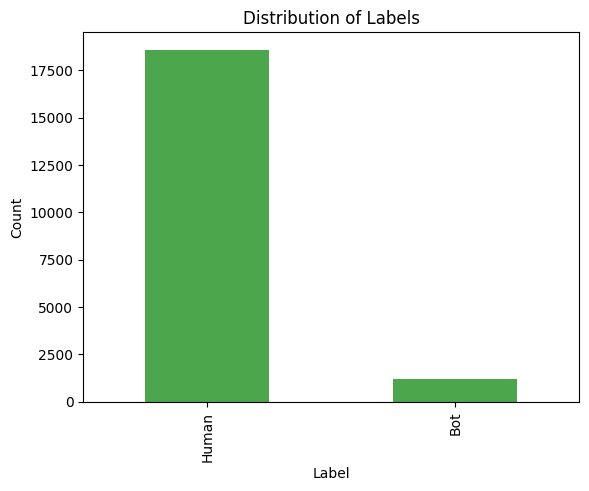

In [33]:
# 示例：绘制标签类别的计数条形图
label_counts = df['label'].value_counts()
label_counts.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

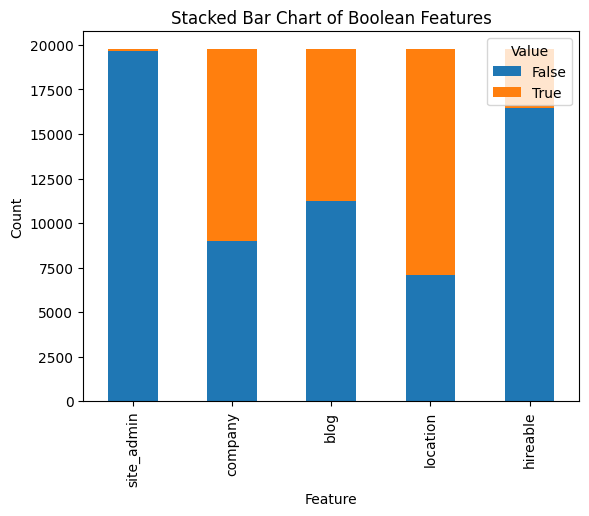

In [34]:
# 示例：绘制布尔特征的堆积柱状图
bool_features = ['site_admin', 'company', 'blog', 'location', 'hireable']

# 创建一个DataFrame，包含各布尔特征的取值计数
bool_counts = df[bool_features].apply(lambda x: x.value_counts())

# 绘制堆积柱状图
bool_counts.T.plot(kind='bar', stacked=True)
plt.xlabel('Feature')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Boolean Features')
plt.legend(title='Value', loc='upper right')
plt.show()

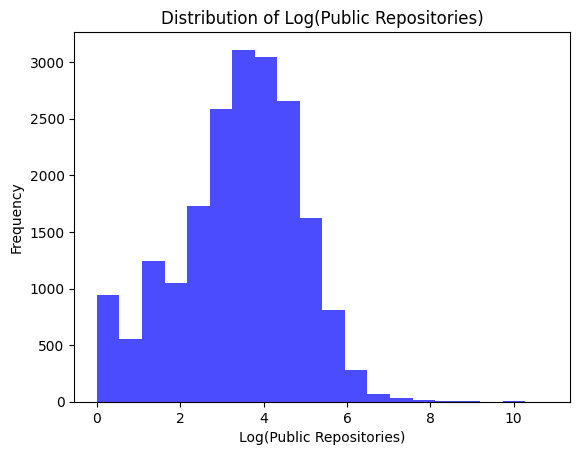

In [35]:
# 示例：绘制public_repos的对数变换后的直方图
log_public_repos = df['log_public_repos']  # 使用对数变换，并避免log(0)
plt.hist(log_public_repos, bins=20, color='blue', alpha=0.7)
plt.xlabel('Log(Public Repositories)')
plt.ylabel('Frequency')
plt.title('Distribution of Log(Public Repositories)')
plt.show()

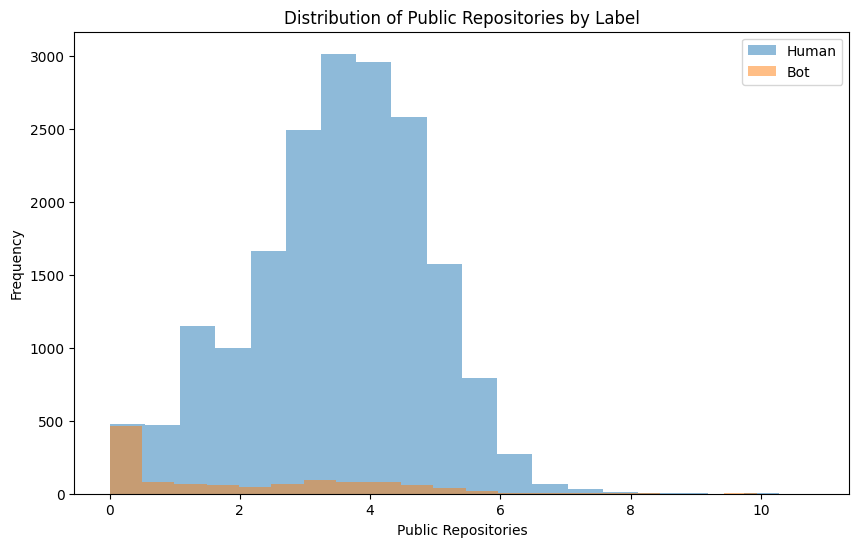

In [36]:
import matplotlib.pyplot as plt

# 示例：绘制不同标签类别下public_repos的分布图
plt.figure(figsize=(10, 6))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.hist(subset['log_public_repos'], bins=20, alpha=0.5, label=label)

plt.xlabel('Public Repositories')
plt.ylabel('Frequency')
plt.title('Distribution of Public Repositories by Label')
plt.legend()
plt.show()

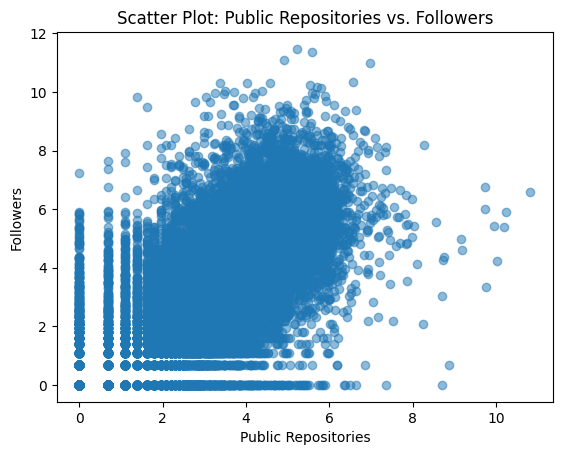

In [37]:
# 示例：绘制public_repos与followers之间的散点图
plt.scatter(df['log_public_repos'], df['log_followers'], alpha=0.5)
plt.xlabel('Public Repositories')
plt.ylabel('Followers')
plt.title('Scatter Plot: Public Repositories vs. Followers')
plt.show()

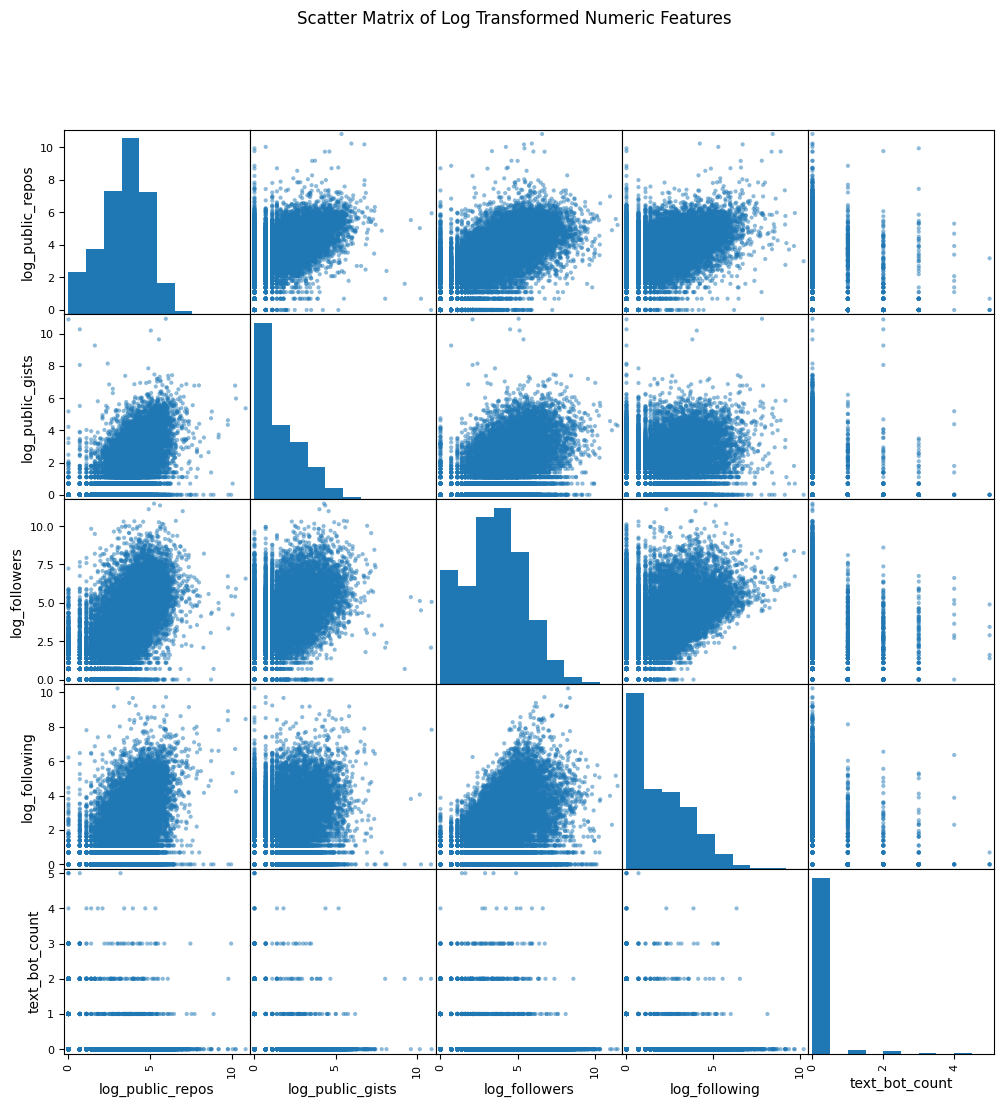

In [38]:
import pandas.plotting as pd_plotting

num_features = ['log_public_repos', 'log_public_gists',
                'log_followers', 'log_following', 'text_bot_count']

# 绘制对数变换后的散点矩阵
pd_plotting.scatter_matrix(
    df[num_features], diagonal='hist', alpha=0.5, figsize=(12, 12))
plt.suptitle('Scatter Matrix of Log Transformed Numeric Features')
plt.show()

### 2 Seaborn

Seaborn是基于Matplotlib的库。基本上，它提供给我们的是更好的图形和功能，只需一行代码即可制作复杂类型的图形。

我们导入库并使用sns.set（）初始化图形样式，如果没有此命令，图形将仍然具有与Matplotlib相同的样式。我们显示了最简单的图形之一，散点图

In [39]:
import seaborn as sns

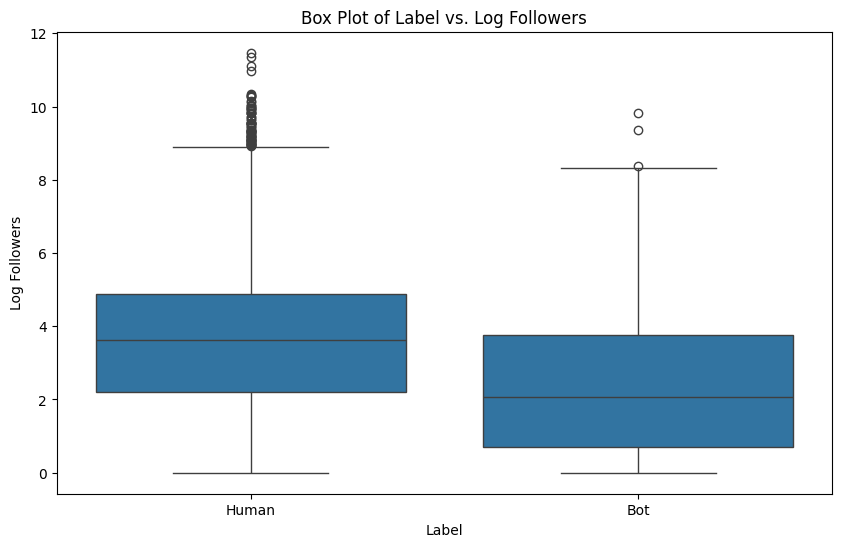

In [40]:
# 箱线图：使用 sns.boxplot() 可视化各个特征相对于 label 的分布，帮助您了解不同类别之间的差异。

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='log_followers')
plt.title('Box Plot of Label vs. Log Followers')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()

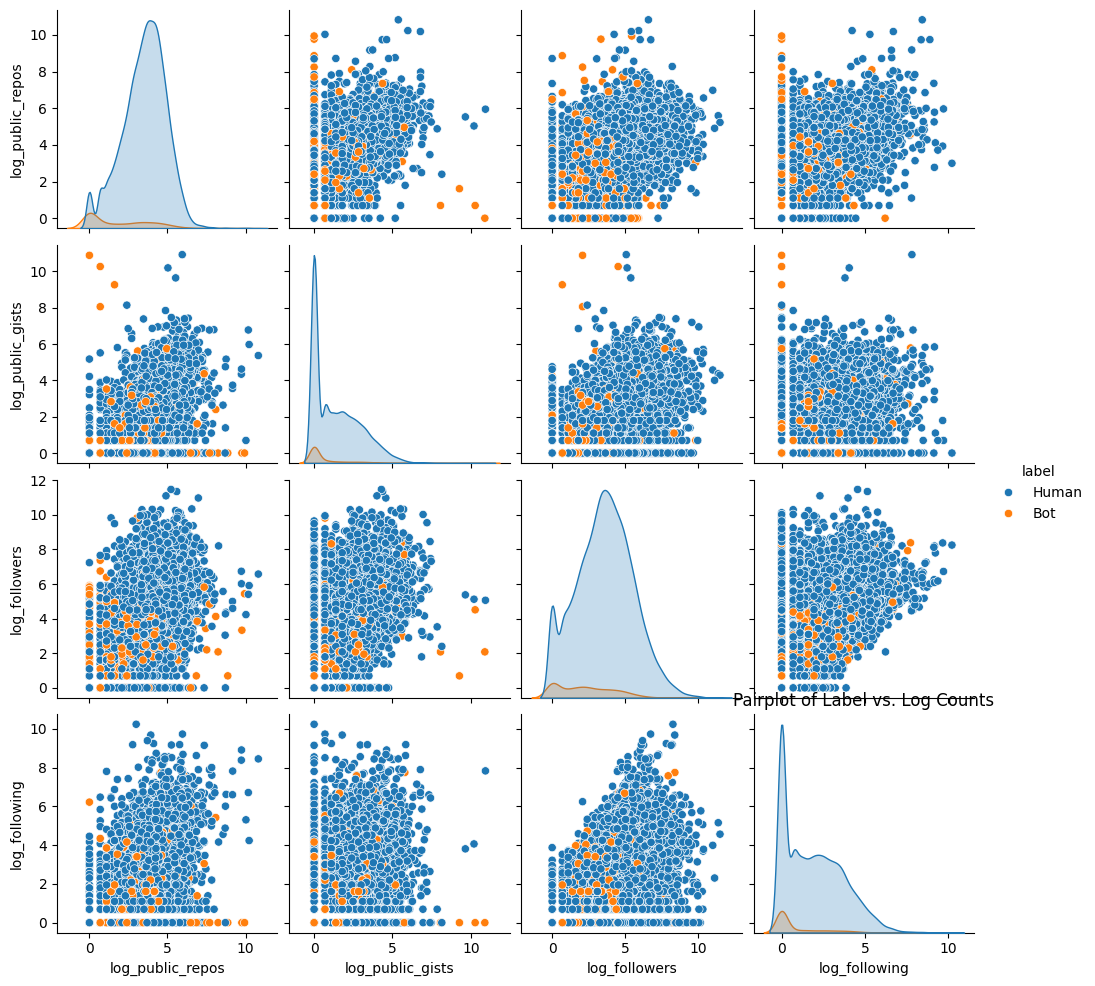

In [41]:
# 成对特征图表：使用 seaborn 的 pairplot 来查看不同特征之间的成对关系，并使用hue参数将label作为颜色标记。

sns.pairplot(data=df, hue='label', vars=[
             'log_public_repos', 'log_public_gists', 'log_followers', 'log_following'])
plt.title('Pairplot of Label vs. Log Counts')
plt.show()

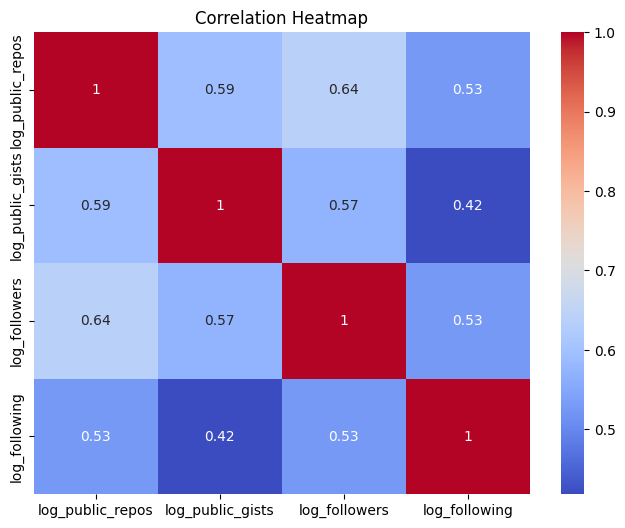

In [42]:
# 热图：使用 sns.heatmap() 可视化各个特征之间的相关性，帮助您了解特征之间的关联

correlation_matrix = df[['log_public_repos',
                         'log_public_gists', 'log_followers', 'log_following']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

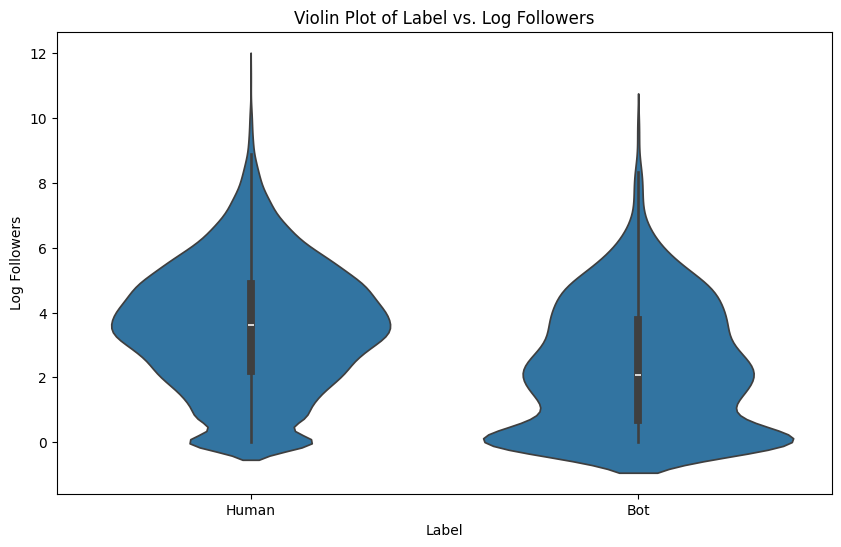

In [43]:
# 小提琴图：使用 sns.violinplot() 类似于箱线图，但提供了更多有关分布的信息。

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='label', y='log_followers')
plt.title('Violin Plot of Label vs. Log Followers')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()